# Problem Statement

There are situations when we all need to rush to hospitals for some emergency and pay high consultation chareges to the doctors. But if we have some data/important information about doctor, we can build a model to predict the fees for a doctor. 

So this is a Regression problem where we have some information related to doctors and we need to predict the consultation charges.

# Know the dataset

Features of the dataset include the following:
    
- Qualification: Qualification and degrees held by the doctor
- Experience: Experience of the doctor in number of years
- Rating: Rating given by patients
- Profile: Type of the doctor
- Miscellaneous_Info: Extra information about the doctor
- Fees: Fees charged by the doctor (Target Variable)
- Place: Area and the city where the doctor is located.

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split ,  cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor


# Importing Dataset

In [3]:
ds=pd.read_excel('Final_Train.xlsx')
df_train=pd.DataFrame(ds)
print('Training Data: ')
df_train.head()

Training Data: 


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
ds=pd.read_excel('Final_Test.xlsx')
df_test=pd.DataFrame(ds)
print('Testing Data: ')
df_test.head()

Testing Data: 


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [5]:
df_train.shape

(5961, 7)

We have 6 input features, 1 output variable (Fees) and 5961 observations in training data.

## Checking missing values

In [6]:
print('Missing in train data: ')
df_train.isnull().sum()

Missing in train data: 


Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [7]:
print('Missing in test data: ')
df_test.isnull().sum()

Missing in test data: 


Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

We can seee that some values are missing in columns Rating and Miscellaneous_Info in both training and testing data. We will be working on these missing values in further steps.

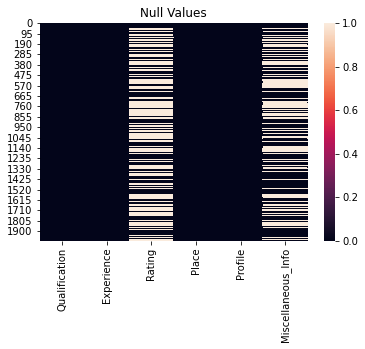

In [8]:
sns.heatmap(df_test.isnull())
plt.title('Null Values')
plt.show()

In [9]:
df_train['City'] = df_train['Place'].str.split(', ').str[-1]
df_train['Area'] = df_train['Place'].str.split(', ').str[0]

df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Area
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Bangalore,Mathikere - BEL
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai


In [10]:
df_test['City'] = df_test['Place'].str.split(', ').str[-1]
df_test['Area'] = df_test['Place'].str.split(', ').str[0]

df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,City,Area
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,Mumbai,Ghatkopar East
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,Hyderabad,West Marredpally
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",Chennai,KK Nagar
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,Delhi,New Ashok Nagar
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,Bangalore,Kanakpura Road


In [11]:
df_train['Experience_years'] = df_train['Experience'].str.slice(stop=2).astype(int)
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Area,Experience_years
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad,24
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield,12
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Bangalore,Mathikere - BEL,9
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road,12
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai,20


In [12]:
df_test['Experience_years'] = df_test['Experience'].str.slice(stop=2).astype(int)
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,City,Area,Experience_years
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,Mumbai,Ghatkopar East,35
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,Hyderabad,West Marredpally,31
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",Chennai,KK Nagar,40
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,Delhi,New Ashok Nagar,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,Bangalore,Kanakpura Road,16


In [13]:
#Fill the NaN values in Rating with 0 as there is no rating available for that doctor.
df_train['Rating'].fillna('0%',inplace = True)
df_test['Rating'].fillna('0%',inplace = True)

In [14]:
df_train['Rating']

0       100%
1        98%
2         0%
3         0%
4       100%
        ... 
5956     98%
5957      0%
5958     97%
5959     90%
5960    100%
Name: Rating, Length: 5961, dtype: object

In [15]:
#Lets drop the percentage sign in rating.
df_train['Rating']=df_train['Rating'].str.slice(stop=-1).astype(int)
df_test['Rating']=df_test['Rating'].str.slice(stop=-1).astype(int)

In [16]:
df_train['Rating']

0       100
1        98
2         0
3         0
4       100
       ... 
5956     98
5957      0
5958     97
5959     90
5960    100
Name: Rating, Length: 5961, dtype: int32

In [17]:
df_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Area,Experience_years
0,"BHMS, MD - Homeopathy",24 years experience,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad,24
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield,12
2,"MBBS, MS - Otorhinolaryngology",9 years experience,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Bangalore,Mathikere - BEL,9
3,"BSc - Zoology, BAMS",12 years experience,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road,12
4,BAMS,20 years experience,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai,20
...,...,...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Bangalore,Basavanagudi,19
5957,MBBS,33 years experience,0,"Nungambakkam, Chennai",General Medicine,NaN,100,Chennai,Nungambakkam,33
5958,MBBS,41 years experience,97,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Delhi,Greater Kailash Part 2,41
5959,"MBBS, MD - General Medicine",15 years experience,90,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,Mumbai,Vileparle West,15


We can see that there are different qualifications for a single doctor i.e. Many doctors holds more than 1 degree, so we can split it into qualification 1, qualification 2 and so on.

In [18]:
df_train['Qualification_1'] = df_train['Qualification'].str.split(',').str[0]
df_train['Qualification_2'] = df_train['Qualification'].str.split(',').str[1]
df_train['Qualification_3'] = df_train['Qualification'].str.split(',').str[2]

df_test['Qualification_1'] = df_test['Qualification'].str.split(',').str[0]
df_test['Qualification_2'] = df_test['Qualification'].str.split(',').str[1]
df_test['Qualification_3'] = df_test['Qualification'].str.split(',').str[2]

In [19]:
df_train.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
City                    25
Area                    25
Experience_years         0
Qualification_1          0
Qualification_2       1962
Qualification_3       4590
dtype: int64

In [20]:
df_train['Qualification_1'].fillna("XXX",inplace = True)
df_train['Qualification_2'].fillna("XXX",inplace = True)
df_train['Qualification_3'].fillna("XXX",inplace = True)

In [21]:
df_test['Qualification_1'].fillna("XXX",inplace = True)
df_test['Qualification_2'].fillna("XXX",inplace = True)
df_test['Qualification_3'].fillna("XXX",inplace = True)

In [22]:
df_train['Place'].fillna("Unknown,Unknown",inplace=True)
df_train['Area'].fillna("Unknown",inplace=True)
df_train['City'].fillna("Unknown",inplace=True)

df_test['Place'].fillna("Unknown,Unknown",inplace=True)
df_test['Area'].fillna("Unknown",inplace=True)
df_test['City'].fillna("Unknown",inplace=True)

In [23]:
df_train['City'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Unknown                 25
e                        1
Name: City, dtype: int64

There is an entry for 'e', which seems incorrect. We can change this entry to 'Unknown'.

In [24]:
df_train.loc[df_train['City']=='e']

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Area,Experience_years,Qualification_1,Qualification_2,Qualification_3
3980,BDS,23 years experience,0,e,Dentist,NaN,250,e,e,23,BDS,XXX,XXX


In [25]:
df_train["City"][3980] = "Unknown"
df_train["Place"][3980] = "Unknown"

In [26]:
df_train['City'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Unknown                 26
Name: City, dtype: int64

In [27]:
df_train.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                    0
Profile                  0
Miscellaneous_Info    2620
Fees                     0
City                     0
Area                     0
Experience_years         0
Qualification_1          0
Qualification_2          0
Qualification_3          0
dtype: int64

Now we are left with missing values in Miscellaneous_Info only, lets first replace it.

In [28]:
df_train['Miscellaneous_Info'].fillna('missing', inplace=True)
df_test['Miscellaneous_Info'].fillna('missing', inplace=True)

Lets extract the feedback from this column and create a new feature named 'Feedback' using this column.

In [31]:
import re
def get_misc_feedback(feedback):
    feedback = re.findall(r'\d+ Feedback', str(feedback))
    if feedback == []:
        feedback = '0 Feedback'
        return feedback
    else:
        return feedback[0]

In [32]:
df_train['Feedback'] = df_train['Miscellaneous_Info'].apply(get_misc_feedback)
df_train['Feedback'] = df_train['Feedback'].str.replace(' Feedback','')
df_train['Feedback'] = df_train['Feedback'].astype(int)

In [33]:
df_test['Feedback'] = df_test['Miscellaneous_Info'].apply(get_misc_feedback)
df_test['Feedback'] = df_test['Feedback'].str.replace(' Feedback','')
df_test['Feedback'] = df_test['Feedback'].astype(int)

In the similar way, lets extract fee from this miscellaneous info and create a new column.

In [34]:
def get_fee(text):
    text = re.sub(r',', "", text)
    text = re.findall(r'₹\d+', text)
    if text != []:
        return text[0]
    else:
        return 0


In [35]:
df_train['Misc_Fees'] = df_train['Miscellaneous_Info'].apply(get_fee)
df_train['Misc_Fees'] = df_train['Misc_Fees'].str.replace('₹','')
df_train['Misc_Fees'].fillna(50, inplace=True)
df_train['Misc_Fees'] = df_train['Misc_Fees'].astype(int)

df_test['Misc_Fees'] = df_test['Miscellaneous_Info'].apply(get_fee)
df_test['Misc_Fees'] = df_test['Misc_Fees'].str.replace('₹','')
df_test['Misc_Fees'].fillna(50, inplace=True)
df_test['Misc_Fees'] = df_test['Misc_Fees'].astype(float)

In [36]:
import re
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

In [37]:
df_train['Miscellaneous_Info'] = df_train['Miscellaneous_Info'].apply(clean_text)
df_test['Miscellaneous_Info'] = df_test['Miscellaneous_Info'].apply(clean_text)

In [38]:
df_test.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
City                  0
Area                  0
Experience_years      0
Qualification_1       0
Qualification_2       0
Qualification_3       0
Feedback              0
Misc_Fees             0
dtype: int64

In [39]:
df_train.dtypes

Qualification         object
Experience            object
Rating                 int32
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
City                  object
Area                  object
Experience_years       int32
Qualification_1       object
Qualification_2       object
Qualification_3       object
Feedback               int32
Misc_Fees              int32
dtype: object

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat_columns=['City','Area','Qualification_1','Qualification_2','Qualification_3','Profile']
for i in cat_columns:
    df_train[i]=le.fit_transform(df_train[i].astype(str))
    df_test[i]=le.fit_transform(df_test[i].astype(str))

In [41]:
df_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Area,Experience_years,Qualification_1,Qualification_2,Qualification_3,Feedback,Misc_Fees
0,"BHMS, MD - Homeopathy",24 years experience,100,"Kakkanad, Ernakulam",5,feedback kakkanad ernakulam,100,4,296,24,8,252,406,16,50
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,"Whitefield, Bangalore",0,feedback whitefield bangalore,350,0,856,12,5,241,406,76,50
2,"MBBS, MS - Otorhinolaryngology",9 years experience,0,"Mathikere - BEL, Bangalore",3,missing,300,0,452,9,79,334,406,0,50
3,"BSc - Zoology, BAMS",12 years experience,0,"Bannerghatta Road, Bangalore",0,bannerghatta road bangalore available on sun feb,250,0,68,12,12,7,406,0,250
4,BAMS,20 years experience,100,"Keelkattalai, Chennai",0,feedback keelkattalai chennai,250,1,335,20,5,426,406,4,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98,"Basavanagudi, Bangalore",3,feedback basavanagudi bangalore,300,0,70,19,79,328,406,45,50
5957,MBBS,33 years experience,0,"Nungambakkam, Chennai",4,missing,100,1,535,33,79,426,406,0,50
5958,MBBS,41 years experience,97,"Greater Kailash Part 2, Delhi",4,feedback greater kailash part delhi,600,3,215,41,79,426,406,11,50
5959,"MBBS, MD - General Medicine",15 years experience,90,"Vileparle West, Mumbai",4,general medical consultation viral fever treat...,100,6,841,15,79,249,406,0,50


In [42]:
df_train.shape, df_test.shape

((5961, 15), (1987, 14))

In [43]:
df_train.drop(['Qualification','Experience','Place','Miscellaneous_Info'],axis=1,inplace=True)
df_test.drop(['Qualification','Experience','Place','Miscellaneous_Info'],axis=1,inplace=True)

In [44]:
df_train.dtypes

Rating              int32
Profile             int32
Fees                int64
City                int32
Area                int32
Experience_years    int32
Qualification_1     int32
Qualification_2     int32
Qualification_3     int32
Feedback            int32
Misc_Fees           int32
dtype: object

In [45]:
df_train

,Rating,Profile,Fees,City,Area,Experience_years,Qualification_1,Qualification_2,Qualification_3,Feedback,Misc_Fees
0,100,5,100,4,296,24,8,252,406,16,50
1,98,0,350,0,856,12,5,241,406,76,50
2,0,3,300,0,452,9,79,334,406,0,50
3,0,0,250,0,68,12,12,7,406,0,250
4,100,0,250,1,335,20,5,426,406,4,50
...,...,...,...,...,...,...,...,...,...,...,...
5956,98,3,300,0,70,19,79,328,406,45,50
5957,0,4,100,1,535,33,79,426,406,0,50
5958,97,4,600,3,215,41,79,426,406,11,50
5959,90,4,100,6,841,15,79,249,406,0,50


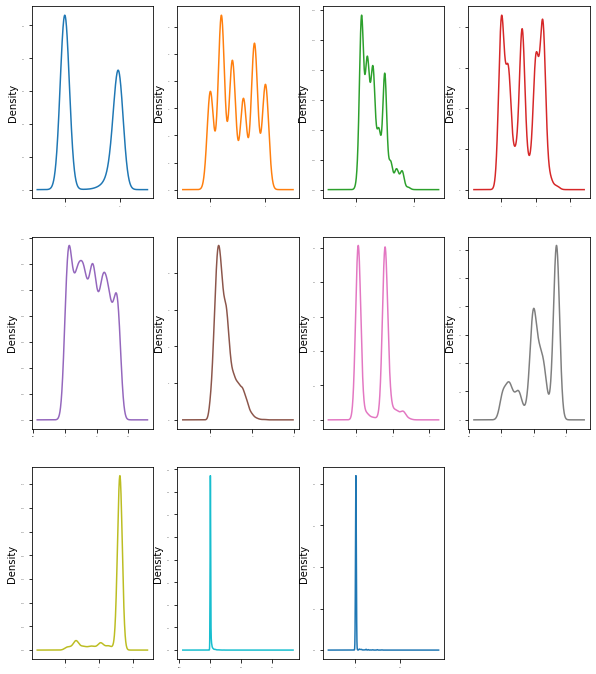

In [46]:
df_train.plot(kind='density',subplots=True,layout=(3,4),sharex=False, legend=False, fontsize=1,figsize=(10,12))
plt.show()

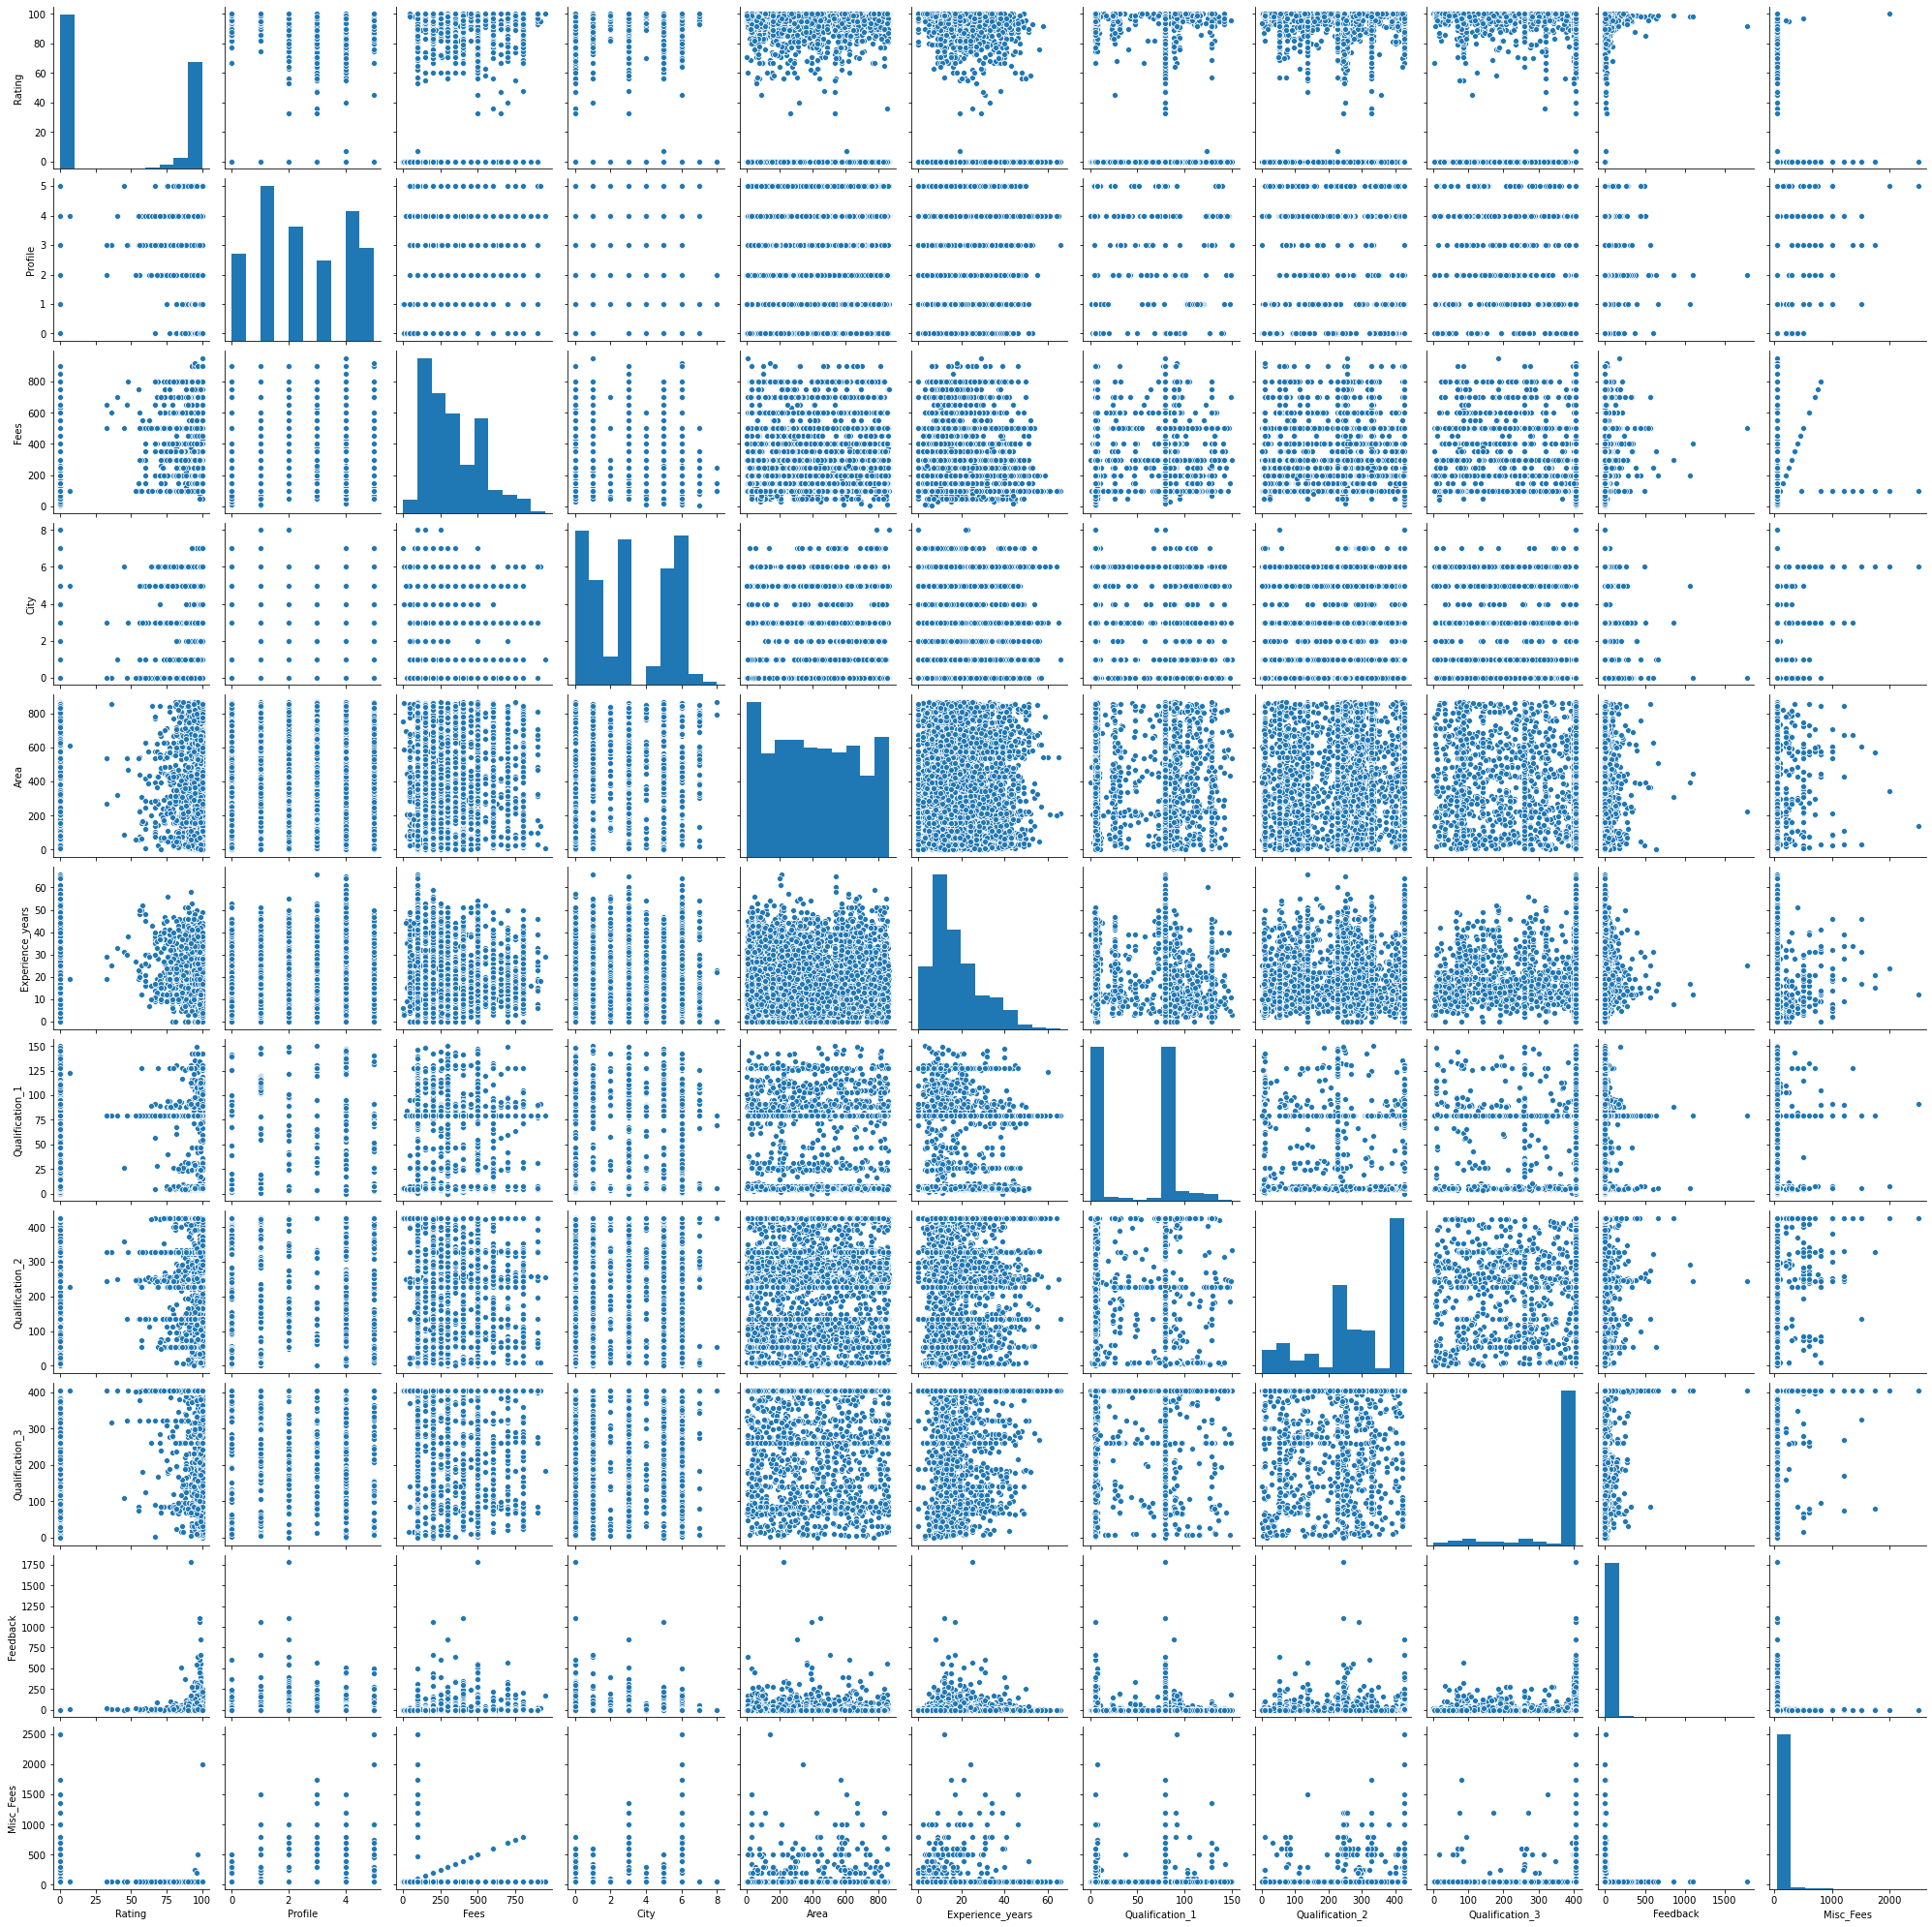

In [47]:
sns.pairplot(df_train)

**Checking Correlation**

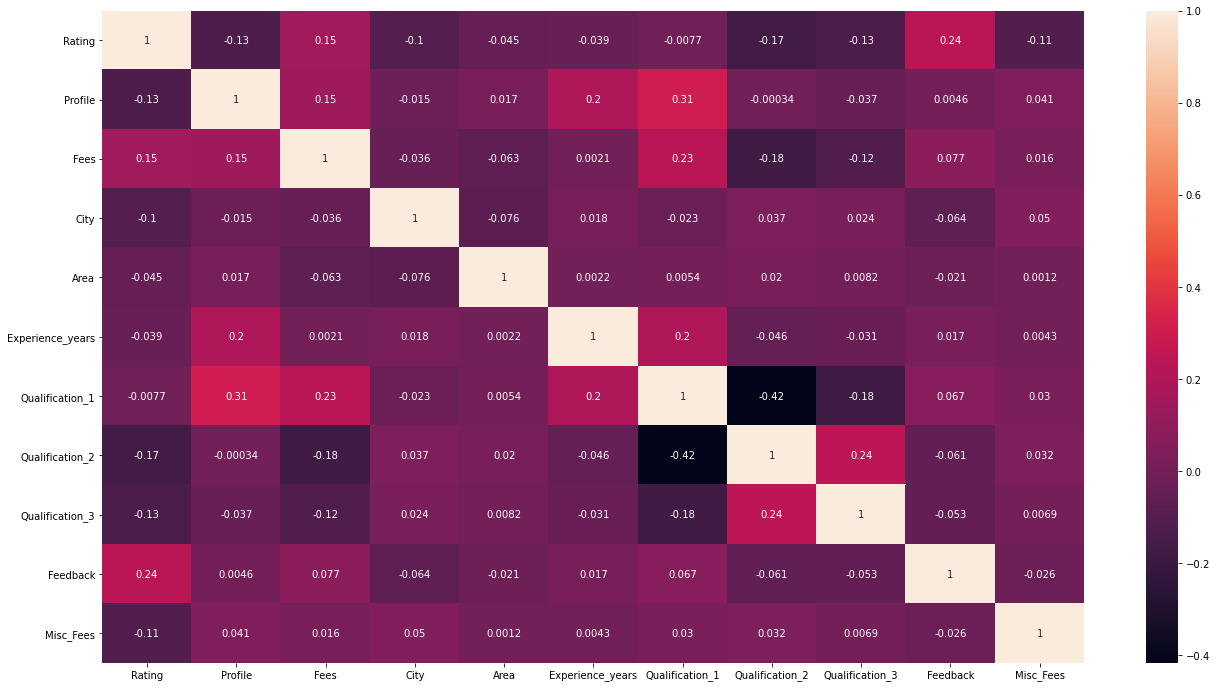

In [48]:
corr_mat=df_train.corr()
plt.figure(figsize=(22,12))
sns.heatmap(corr_mat,annot=True)
plt.show()

In [49]:
corr_matrix=df_train.corr()
corr_matrix['Fees'].sort_values(ascending=False)

Fees                1.000000
Qualification_1     0.233285
Rating              0.153273
Profile             0.145226
Feedback            0.076751
Misc_Fees           0.016133
Experience_years    0.002117
City               -0.035898
Area               -0.062557
Qualification_3    -0.119550
Qualification_2    -0.177216
Name: Fees, dtype: float64

POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation. We can see some variables have positive correlation with the target variable.

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation. We can see some variables have negative correlation with the target variable

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. So we can carry on with all features.

Qualification_1 is the most closely related to the target variable. Other features like Rating,Qualification_2 and Profile also impacts the doctor's fee.


**Removing Outliers**

In [50]:
from scipy.stats import zscore
z=np.abs(zscore(df_train))

In [51]:
df_new=df_train[(z<3).all(axis=1)]

In [52]:
df_new.shape, df_train.shape

((5613, 11), (5961, 11))

Boxplot for original dataset


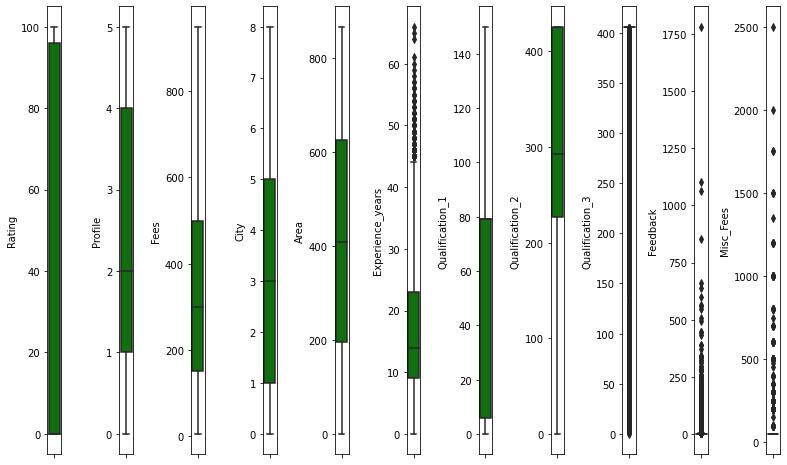

In [53]:
collist=df_train.columns.values
ncol=30
nrows=14
print('Boxplot for original dataset')
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_train[collist[i]],color='green',orient='v')
    plt.tight_layout()

Box plot after removing outliers


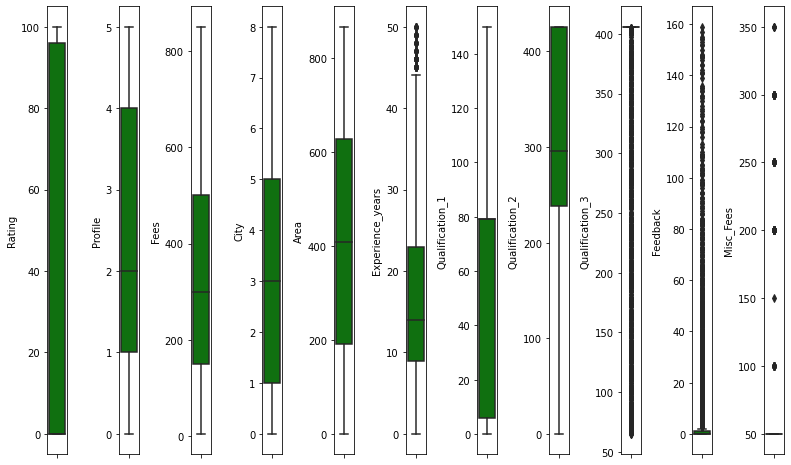

In [54]:
collist=df_new.columns.values
ncol=30
nrows=14
print('Box plot after removing outliers')
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_new[collist[i]],color='green',orient='v')
    plt.tight_layout()

# ML model development

In [55]:
x=df_train.drop('Fees',axis=1)
y=df_train['Fees']

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.2)

from sklearn.model_selection import train_test_split ,  cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

model_reg = [RandomForestRegressor(), SVR(), DecisionTreeRegressor(),KNeighborsRegressor(),LinearRegression(normalize=True),Ridge(alpha=0.05,normalize=True)]
df_result=pd.DataFrame(columns=['Model','Score','Mean Absolute Error','RMSE','R2 Score'])


for model in model_reg:
    m = model
    test_string=str(m)
    spl_word='('
    print('Model: ',m)
    m.fit(x_train, y_train)
    pred = m.predict(x_test)
    acc=m.score(x_train,y_train)
    acc_final=acc
    print('Score: ', acc_final)
    rmse = np.mean(np.sqrt(-cross_val_score(model, x_test, y_test, cv=5, scoring="neg_mean_squared_error")))
    r2_scr=r2_score(y_test,pred)
    #scr=cross_val_score(m,x,y,cv=5,scoring)
    #scr=np.sqrt(np.abs(scr['test_score']))
    #scr_final=np.mean(scr)
    #scr_final=scr.mean()
    print('RMSEe: ',rmse)
    #diff=(acc_final-scr_final)
    mean_abs_error=mae(y_test,pred)
    #print('Difference between cross validation score and accuracy is ', diff)
    print('------------------------------------------------')
    df_result=df_result.append({'Model':test_string,'Score':acc_final,'Mean Absolute Error':mean_abs_error,'RMSE':rmse,'R2 Score':r2_scr}, ignore_index=True)

print(df_result)
    

Model:  RandomForestRegressor()
Score:  0.8844228572914014
RMSEe:  180.40452714574718
------------------------------------------------
Model:  SVR()
Score:  0.009956865661968295
RMSEe:  194.90198637709133
------------------------------------------------
Model:  DecisionTreeRegressor()
Score:  0.9979942264730072
RMSEe:  248.86020724124728
------------------------------------------------
Model:  KNeighborsRegressor()
Score:  0.33981005441612744
RMSEe:  196.00075354901043
------------------------------------------------
Model:  LinearRegression(normalize=True)
Score:  0.09870682728925351
RMSEe:  185.09199831121936
------------------------------------------------
Model:  Ridge(alpha=0.05, normalize=True)
Score:  0.09855333895746088
RMSEe:  184.9580635612862
------------------------------------------------
                               Model     Score  Mean Absolute Error  \
0            RandomForestRegressor()  0.884423           133.300106   
1                              SVR()  0.00995

In [57]:
df_result

,Model,Score,Mean Absolute Error,RMSE,R2 Score
0,RandomForestRegressor(),0.884423,133.300106,180.404527,0.209079
1,SVR(),0.009957,153.512591,194.901986,0.004468
2,DecisionTreeRegressor(),0.997994,163.667225,248.860207,-0.384747
3,KNeighborsRegressor(),0.339810,146.012070,196.000754,0.052968
4,LinearRegression(normalize=True),0.098707,148.617174,185.091998,0.107964
5,"Ridge(alpha=0.05, normalize=True)",0.098553,148.864167,184.958064,0.107055


We can say that Random Forest Regressor is the best fit model for our problem. 

**Saving our best fit model**

In [58]:
rf = RandomForestRegressor()
rf.fit(x_train , y_train)
rf.score(x_train , y_train)

0.8827623819481715

In [59]:
y_pred = rf.predict(x_test)

In [60]:
print("Predicted result: ",y_pred)
print("Actual result : ", y_test)

Predicted result:  [283.5 389.7  94.1 ... 229.  341.  292.5]
Actual result :  2819    100
3940    200
5487    500
3794    200
1182    100
       ... 
4230    500
5867    500
5866    100
4820    400
5087    100
Name: Fees, Length: 1193, dtype: int64


In [61]:
print("Error : ")

# MAE is the sum of absolute differences between our target and predicted variables. 
# So it measures the average magnitude of errors in a set of predictions, without considering their directions. 
print('Mean absolute error : ', mean_absolute_error(y_test,y_pred))

# MSE(Mean Squared Error) is the sum of squared distances between our target variable and predicted values.
print('Mean squared error : ', mean_squared_error(y_test,y_pred))

# Residuals are a measure of how far from the regression line data points are
print('Root mean squared error : ', np.sqrt(mean_squared_error(y_test,y_pred)))

Error : 
Mean absolute error :  132.8388522332655
Mean squared error :  29827.97598212404
Root mean squared error :  172.70777626419732


## Hyper Parameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
parameters={
 'bootstrap': [True],
 'max_depth': [100,80],
 'max_features': [3,5,20],
 'min_samples_leaf': [3,5],
 'min_samples_split': [10,15,30],
 'n_estimators': [100,300,500]
}

In [64]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [65]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [100, 80],
                         'max_features': [3, 5, 20], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [10, 15, 30],
                         'n_estimators': [100, 300, 500]})

In [66]:
GCV.best_params_ #printing the best parameters found by GridSearchCV

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 500}

In [67]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [68]:
GCV.score(x_train,y_train)

0.5438921440794642

## Saving the final model

In [69]:
rf = RandomForestRegressor(bootstrap=True,max_depth=80,max_features= 3,min_samples_leaf=3,min_samples_split=10,n_estimators=100)
rf.fit(x_train , y_train)
rf.score(x_train , y_train)

0.540790254925554

In [71]:
# Saving the prediction for test dataset
pred_test=pd.DataFrame(rf.predict(df_test),columns=['Fees'])

pred_test.to_csv('submission.csv')

In [72]:
import joblib
joblib.dump(rf,'Doctor Fee.obj')

['Doctor Fee.obj']